# Joe Stanley
### ECE 522 - Homework 3

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import electricpy as ep
from electricpy.constants import *
from tabulate import tabulate

## Example: (Session 5, Handout C)

Slot Pitch (sigma): 20.0 °
Slot Opening (beta): 10.0 °
Coil Pitch (CPrad): 140.0 °
Gamma: 40.0 °
Harmonic Set:
 [  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101] 

  h      ah     kph     kdh      ach
---  ------  ------  ------  -------
  1  35.446   0.94    0.988   38.197
  3  -5.672   0.5     0.891  -12.732
  5  -0.948  -0.174   0.715    7.639
  7   2.047  -0.766   0.49    -5.457
  9  -1.074  -1       0.253    4.244
 11   0.111  -0.766   0.042   -3.472
 13   0.059  -0.174  -0.115    2.938
 15   0.256   0.5    -0.201   -2.546
 17  -0.452   0.94   -0.214    2.247
 19   0.319   0.94   -0.169   -2.01
 21  -0.079   0.5    -0.087    1.819
 23   0.001  -0.174   0.004   -1.661
 25  -0.092  -0.766   0.079    1.528
 27   0.172  -1       0.122   -1.415
 29  -0.126  -0.766   0.125    1.317
 31   0.02   -0.174   0.094   -1.232
 33   0.024  

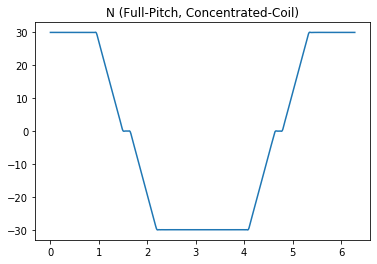

In [26]:
# Define Terms
Ncp = 60
Nslots = 18

# Define Sigma (Slot Pitch)
sigma = 2*np.pi/Nslots
print("Slot Pitch (sigma):",np.degrees(sigma),"°")

# Define Beta (Slot Opening)
beta = 0.5*sigma
print("Slot Opening (beta):",np.degrees(beta),"°")

# Define Coil Pitch
CPslots = 7
CPrad = CPslots*np.pi*2/Nslots
print("Coil Pitch (CPrad):",np.degrees(CPrad),"°")

# Define Gamma
gamma = np.pi - CPrad
print("Gamma:",round(np.degrees(gamma),2),"°")

# Define Harmonic Array
h = np.arange(1,102,2)
print("Harmonic Set:\n",h,"\n")

####################################################################

# Evaluate F.S. Coefficient of Full Pitch Concentrated Coil Winding
ach = (2*Ncp) / (np.pi*h) * np.sin(h*np.pi/2)

# Evaluate Pitch Factor
kph = np.cos(h*(gamma/2))

# Distribution Factor
kdh = np.sinc(h*(beta/2))

#####################################################################

# Combine Terms to Evaluate ah
ah = kph * kdh * ach

# Evaluate Summation
data = np.array([])
for i, h_i in enumerate(h):
    row = [h_i, ah[i], kph[i], kdh[i], ach[i]]
    data = np.append(data, row)
data = np.around(np.reshape(data, (len(data)//5,5)),3)
print(tabulate(data,headers=['h', 'ah', 'kph', 'kdh', 'ach']))

#####################################################################

# Evaluate Terms for Plot
alpha = np.linspace(0,2*np.pi,1000)
NFuPUD = np.zeros(len(alpha))
for i, AH in enumerate(ah):
    NFuPUD += AH * np.cos(h[i]*alpha)
# Generate Plot
plt.plot(alpha,NFuPUD)
plt.title("N (Full-Pitch, Concentrated-Coil)")
plt.show()

## Assignment Question:
Repeat the (above) example for a Fractional-Pitch, Concentrated-Coil winding.

In [ ]:
# Define Terms
Ncp = 60
Nslots = 18

# Define Sigma (Slot Pitch)
sigma = 2*np.pi/Nslots
print("Slot Pitch (sigma):",np.degrees(sigma),"°")

# Define Beta (Slot Opening)
beta = 0.5*sigma
print("Slot Opening (beta):",np.degrees(beta),"°")

# Define Coil Pitch
CPslots = 7
CPrad = CPslots*np.pi*2/Nslots
print("Coil Pitch (CPrad):",np.degrees(CPrad),"°")

# Define Gamma
gamma = np.pi - CPrad
print("Gamma:",round(np.degrees(gamma),2),"°")

# Define Harmonic Array
h = np.arange(1,102,2)
print("Harmonic Set:\n",h,"\n")

####################################################################

# Evaluate F.S. Coefficient of Full Pitch Concentrated Coil Winding
ach = (2*Ncp) / (np.pi*h) * np.sin(h*np.pi/2)

# Evaluate Pitch Factor
kph = np.cos(h*(gamma/2))

# Distribution Factor
kdh = np.sinc(h*(beta/2))

#####################################################################

# Combine Terms to Evaluate ah
ah = kph * kdh * ach

# Evaluate Summation
data = np.array([])
for i, h_i in enumerate(h):
    row = [h_i, ah[i], kph[i], kdh[i], ach[i]]
    data = np.append(data, row)
data = np.around(np.reshape(data, (len(data)//5,5)),3)
print(tabulate(data,headers=['h', 'ah', 'kph', 'kdh', 'ach']))

#####################################################################

# Evaluate Terms for Plot
alpha = np.linspace(0,2*np.pi,1000)
NFuPUD = np.zeros(len(alpha))
for i, AH in enumerate(ah):
    NFuPUD += AH * np.cos(h[i]*alpha)
# Generate Plot
plt.plot(alpha,NFuPUD)
plt.title("N (Full-Pitch, Concentrated-Coil)")
plt.show()